In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from prophet import Prophet

# Indlæsning af data

In [2]:
sf_data         = pd.read_csv("../data/sf_data.csv", delimiter=";")
sf_districts    = pd.read_csv("../data/sf_districts.csv", delimiter=";")
sf_data_joined  = sf_data.merge(sf_districts, on='id')

# Dataformatering

In [3]:
crime          = sf_data_joined.copy()
crime["date"]  = pd.to_datetime(crime["date"], format="%m/%d/%Y")
crime["month"] = crime["date"].dt.month
crime["year"]  = crime["date"].dt.year

# Analyse af antal forbrydelser efter kategori over tid

In [4]:
top5_category_count = {
    "larceny/theft":     99205,
    "other offenses":    93381,
    "drug/narcotic":     71757,
    "non-criminal":      61517,
    "assault":           53665,
}

In [5]:
crime_category_filtered   = crime.loc[crime["category"].isin(top5_category_count)] # filtrer efter top 5 kategorier (se 1_indledende_analyse)
crime_category_filtered   = crime_category_filtered.loc[crime["date"] < datetime(2018,5,1)] # maj 2018 indeholder kun data for en halv måned
crime_category_ts         = crime_category_filtered.groupby(["category", "year", "month"], as_index=False).size()
crime_category_ts["time"] = [datetime(y,m,1) for y, m in zip(crime_category_ts["year"], crime_category_ts["month"])]

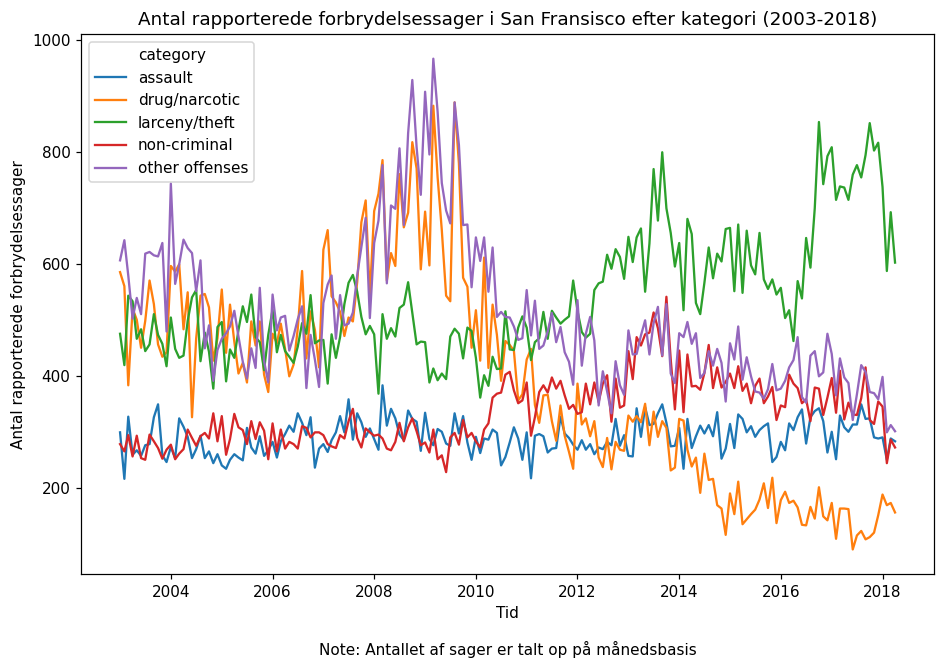

In [6]:
fig, ax = plt.subplots(dpi=110, figsize=(10,6.5))
sns.lineplot(x="time", y="size", hue="category", data=crime_category_ts, ax=ax)
plt.title("Antal rapporterede forbrydelsessager i San Fransisco efter kategori (2003-2018)")
plt.ylabel("Antal rapporterede forbrydelsessager")
plt.xlabel("""Tid

Note: Antallet af sager er talt op på månedsbasis""");